# Метод Тейлора 4-го порядка(Рунге-кута 4-го порядка)

In [123]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
from numpy.linalg import norm

x=[0,2]
init_cond = [1,0,-26/9] #y(0)=1, y'(0)=0, y''(0)=-26/9

## Функции

In [133]:
def f(x):
    return np.exp(-3*x)

def taylor(count, x_limits, initial):
    xmin, xmax = x_limits 
    y, p, q = initial 
    h = (xmax - xmin)/(2**count) 
    x = xmin 
    N = 0
    X = np.array([x])
    Y = np.array([y])
    P = np.array([p])
    Q = np.array([q])

    while x < xmax:
        x += h
        N += 1
        
        ky1 = 6*p
        ky2 = q*h/4
        ky3 = (-2*q -3*p -(1/3)*f(x))*h**2/2
        ky4 = (q +6*p +(5/3)*f(x))*h**3/4
        
        kp1 = 6*q
        kp2 = (-2*q -3*p -(1/3)*f(x))*h/4
        kp3 = (q+6*p+(5/3)*f(x))*h**2/2
        kp4 = (4*q - 3*p - (16/3)*f(x))*h**3/4

        kq1 = 6*(-2*q -3*p -(1/3)*f(x))
        kq2 = (q+6*p+(5/3)*f(x))*h/4
        kq3 = (4*q - 3*p - (16/3)*f(x))*h**2/2
        kq4 = (-11*q - 12*p + (44/3)*f(x))*h**3/4
        
        y_next = y + h/6*(ky1 + 2*ky2 + 2*ky3 + ky4)
        p_next = p + h/6*(kp1 + 2*kp2 + 2*kp3 + kp4)
        q_next = q + h/6*(kq1 + 2*kq2 + 2*kq3 + kq4)

        y,p,q=y_next,p_next,q_next
        
        X = np.append(X,x)
        Y = np.append(Y,y)
        P = np.append(P,p)
        Q = np.append(Q,q)
    return [X,Y,P,Q,h]

def diff_system(args, x):
    y,p,q = args
    return [p, q, -2*q -3*p -1/3*f(x)] 

## Ищем решение 

In [134]:
eps = 0.01
N = 0

while True:
    T = taylor(N, x, init_cond)
    T2 = taylor(N+1, x, init_cond)
    error = (norm(T[1] - T2[1][0::2]) + norm(T[2] - T2[2][0::2]) + norm(T[3] - T2[3][0::2]))/(norm(T2[1]) + norm(T2[2]) + norm(T2[3]))
    N += 1
    if error < eps:
        #print(error)
        #print(N)
        break
X, Y, P, Q, h = T2

## Решение встроенной функцией

In [135]:
sol = odeint(diff_system, init_cond, X)
Y_libr = sol[:,0]
P_libr = sol[:,1]
Q_libr = sol[:,2]

## Графики

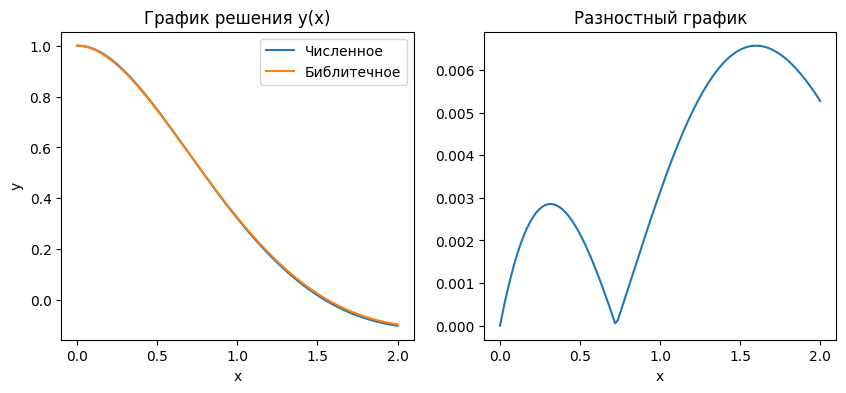

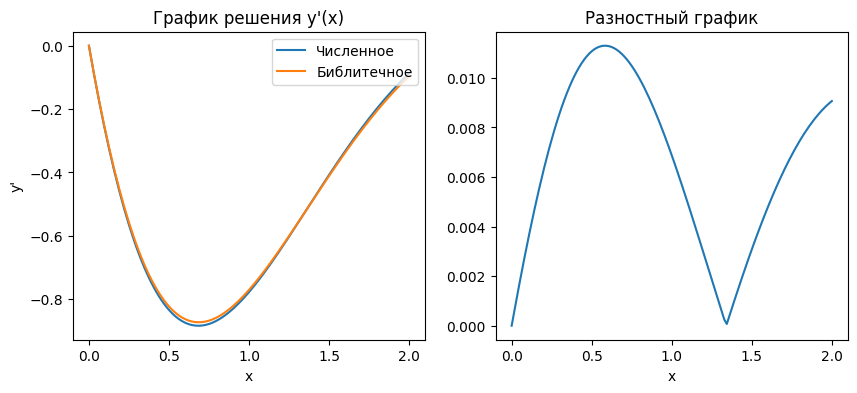

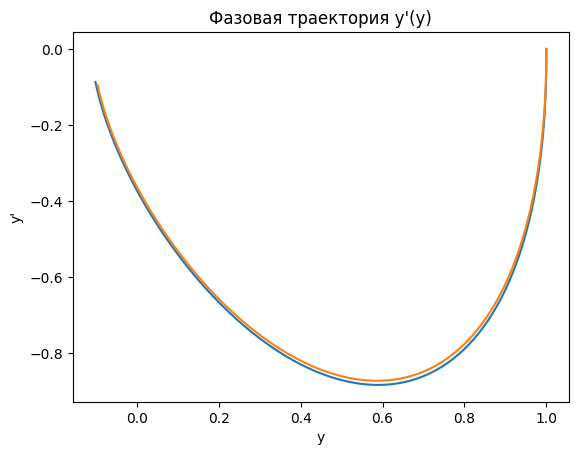

'\n#y"(x)\nplt.figure(figsize=(10,4))\nplt.subplot(1,2,1)\nplt.plot(X,Q, label = "Численное")\nplt.plot(X,Q_libr,\'.\', label = "Библитечное")\nplt.xlabel(\'x\')\nplt.ylabel(\'y"\')\nplt.title("График решения y\'\'(x)")\nplt.subplot(1,2,2)\nplt.plot(X,abs(Q - Q_libr))\nplt.xlabel(\'x\')\nplt.title(\'Разностный график\')\nplt.show()\n\n#y"(y)\nplt.plot(Y,Q, label = "Численное")\nplt.plot(Y_libr,Q_libr,\'.\', label = "Библитечное")\nplt.xlabel("y")\nplt.ylabel(\'y"\')\nplt.title(\'Фазовая траектория y"(y)\')\nplt.show()\n\n#y"(y\')\nplt.plot(P,Q, label = "Численное")\nplt.plot(P_libr,Q_libr,\'.\', label = "Библитечное")\nplt.xlabel("y\'")\nplt.ylabel(\'y"\')\nplt.title(\'Фазовая траектория y"(y\')\')\nplt.show()\n'

In [136]:
#y(x)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(X,Y, label = "Численное")
plt.plot(X,Y_libr, label = "Библитечное")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper right')
plt.title('График решения y(x)')
plt.subplot(1,2,2)
plt.plot(X,abs(Y - Y_libr))
plt.xlabel('x')
plt.title('Разностный график')
plt.show()

#y'(x)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(X,P, label = "Численное")
plt.plot(X,P_libr, label = "Библитечное")
plt.xlabel('x')
plt.ylabel("y'")
plt.legend(loc='upper right')
plt.title("График решения y'(x)")
plt.subplot(1,2,2)
plt.plot(X,abs(P - P_libr))
plt.xlabel('x')
plt.title('Разностный график')
plt.show()

#y'(y)
plt.plot(Y,P, label = "Численное")
plt.plot(Y_libr,P_libr, label = "Библитечное")
plt.xlabel("y")
plt.ylabel("y'")
plt.title("Фазовая траектория y'(y)")
plt.show()

"""
#y"(x)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(X,Q, label = "Численное")
plt.plot(X,Q_libr,'.', label = "Библитечное")
plt.xlabel('x')
plt.ylabel('y"')
plt.title("График решения y''(x)")
plt.subplot(1,2,2)
plt.plot(X,abs(Q - Q_libr))
plt.xlabel('x')
plt.title('Разностный график')
plt.show()

#y"(y)
plt.plot(Y,Q, label = "Численное")
plt.plot(Y_libr,Q_libr,'.', label = "Библитечное")
plt.xlabel("y")
plt.ylabel('y"')
plt.title('Фазовая траектория y"(y)')
plt.show()

#y"(y')
plt.plot(P,Q, label = "Численное")
plt.plot(P_libr,Q_libr,'.', label = "Библитечное")
plt.xlabel("y'")
plt.ylabel('y"')
plt.title('Фазовая траектория y"(y')')
plt.show()
"""

In [128]:
print('Погрешность решения:', error)
print('Количество итераций:',N)
print('Шаг по сетке h =',h)

Погрешность решения: 0.009879760918555058
Количество итераций: 7
Шаг по сетке h = 0.015625
